In [230]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2, atan, degrees

In [231]:
geo_total = pd.read_csv("/Users/brandonyu/Downloads/geo_df.csv")

In [232]:
geo_total.head()

,Unnamed: 0,Block Group,Cencus Tract,Weighted HH Inc Int,Median HH Inc Int,Geoid1,Weighted HH Inc,Median HH Income_x,Total (Household Count Census 2020.csv),Total: (Population Race P3 Census 2020.csv),...,name_,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,Shape__Area,Shape__Length
0,0,1,124.05,836,42383,6075012405,$836,"$42,383",703,"1,332",...,124.05,Census Tract 124.05,G5020,S,295197,0,37.779519,-122.417462,0.000030,0.024195
1,1,1,176.02,2697,149483,6075017602,$0,$0,953,"1,898",...,176.02,Census Tract 176.02,G5020,S,273225,0,37.782124,-122.407018,0.000028,0.025162
2,2,1,176.03,1527,73403,6075017603,"$1,527","$73,403",741,"1,151",...,176.03,Census Tract 176.03,G5020,S,248651,0,37.776309,-122.414341,0.000025,0.023820
3,3,1,176.04,2436,123944,6075017604,"$2,436","$123,944",700,921,...,176.04,Census Tract 176.04,G5020,S,111719,0,37.779858,-122.411743,0.000011,0.015468
4,4,1,177.00,1056,165789,6075017700,"$1,056","$165,789",227,"1,041",...,177.00,Census Tract 177,G5020,S,904078,0,37.768044,-122.412492,0.000092,0.047902


In [233]:
geo_total.columns

Index(['Unnamed: 0', 'Block Group', 'Cencus Tract', 'Weighted HH Inc Int',
       'Median HH Inc Int', 'Geoid1', 'Weighted HH Inc', 'Median HH Income_x',
       'Total (Household Count Census 2020.csv)',
       'Total: (Population Race P3 Census 2020.csv)',
       'Total: (Population Race P8 Census 2020.csv)', 'Total:!!White alone',
       'Total:!!Asian alone', 'Total:!!Two or More Races',
       'Total:!!Black or African American alone',
       'Total:!!Some Other Race alone',
       'Total:!!American Indian and Alaska Native alone',
       'Total:!!Native Hawaiian and Other Pacific Islander alone', '% White',
       '% Asian', '% Two or More', '% Black', '% Other', '% American Indian',
       '% Pacific Islander', 'Median HH Income_y', '23-24 K count',
       '24-25 K count', 'Avg K Count', '23-24 FRL K count',
       '24-25 FRL K count', 'Avg FRL K Count', '23-24 Asian', '23-24 Hispanic',
       '23-24 White', '23-24 Black', '23-24 Other', '24-25 Asian',
       '24-25 Hispanic', '2

In [234]:
geo_cleaned = geo_total[["Block Group", "Cencus Tract", "Weighted HH Inc Int", "Median HH Inc Int", "Geoid1", "Total (Household Count Census 2020.csv)", "Total: (Population Race P3 Census 2020.csv)", "% White",
       "% Asian", "% Two or More", "% Black", "% Other", "% American Indian",
       "% Pacific Islander", "intptlat", "intptlon", "Shape__Area", "Shape__Length"]]

In [235]:
geo_cleaned.head()

,Block Group,Cencus Tract,Weighted HH Inc Int,Median HH Inc Int,Geoid1,Total (Household Count Census 2020.csv),Total: (Population Race P3 Census 2020.csv),% White,% Asian,% Two or More,% Black,% Other,% American Indian,% Pacific Islander,intptlat,intptlon,Shape__Area,Shape__Length
0,1,124.05,836,42383,6075012405,703,"1,332",38.4%,15.3%,10.1%,17.0%,17.6%,1.4%,0.2%,37.779519,-122.417462,0.000030,0.024195
1,1,176.02,2697,149483,6075017602,953,"1,898",28.7%,37.8%,7.0%,14.0%,11.0%,1.4%,0.2%,37.782124,-122.407018,0.000028,0.025162
2,1,176.03,1527,73403,6075017603,741,"1,151",37.4%,37.5%,9.2%,9.2%,5.3%,1.2%,0.2%,37.776309,-122.414341,0.000025,0.023820
3,1,176.04,2436,123944,6075017604,700,921,38.0%,44.0%,8.1%,3.8%,5.4%,0.4%,0.2%,37.779858,-122.411743,0.000011,0.015468
4,1,177.00,1056,165789,6075017700,227,"1,041",44.9%,22.4%,8.5%,14.2%,8.5%,0.8%,0.7%,37.768044,-122.412492,0.000092,0.047902


In [236]:
racial_columns = ['% White', '% Asian', '% Two or More', '% Black', 
                  '% Other', '% American Indian', '% Pacific Islander']

def is_valid_percentage(x):
    x = str(x).replace('%', '').replace('.', '', 1)
    return x.isdigit()

valid_mask = geo_cleaned[racial_columns].map(is_valid_percentage).all(axis=1)

geo_cleaned = geo_cleaned[valid_mask].copy()

geo_cleaned.reset_index(drop=True, inplace=True)

geo_cleaned[racial_columns] = geo_cleaned[racial_columns].replace(
    to_replace=r'%', value='', regex=True
).astype(float)

In [237]:
print(geo_cleaned["Total (Household Count Census 2020.csv)"].dtype)

object


In [238]:
geo_cleaned["Total: (Population Race P3 Census 2020.csv)"] = geo_cleaned["Total: (Population Race P3 Census 2020.csv)"].str.split(',')
geo_cleaned["Total: (Population Race P3 Census 2020.csv)"] = geo_cleaned["Total: (Population Race P3 Census 2020.csv)"].apply(lambda lst: int(''.join(map(str, lst))))

In [239]:
geo_cleaned.head()

,Block Group,Cencus Tract,Weighted HH Inc Int,Median HH Inc Int,Geoid1,Total (Household Count Census 2020.csv),Total: (Population Race P3 Census 2020.csv),% White,% Asian,% Two or More,% Black,% Other,% American Indian,% Pacific Islander,intptlat,intptlon,Shape__Area,Shape__Length
0,1,124.05,836,42383,6075012405,703,1332,38.4,15.3,10.1,17.0,17.6,1.4,0.2,37.779519,-122.417462,0.000030,0.024195
1,1,176.02,2697,149483,6075017602,953,1898,28.7,37.8,7.0,14.0,11.0,1.4,0.2,37.782124,-122.407018,0.000028,0.025162
2,1,176.03,1527,73403,6075017603,741,1151,37.4,37.5,9.2,9.2,5.3,1.2,0.2,37.776309,-122.414341,0.000025,0.023820
3,1,176.04,2436,123944,6075017604,700,921,38.0,44.0,8.1,3.8,5.4,0.4,0.2,37.779858,-122.411743,0.000011,0.015468
4,1,177.00,1056,165789,6075017700,227,1041,44.9,22.4,8.5,14.2,8.5,0.8,0.7,37.768044,-122.412492,0.000092,0.047902


In [240]:
geo_cleaned["Total (Household Count Census 2020.csv)"] = geo_cleaned["Total (Household Count Census 2020.csv)"].str.split(',')
geo_cleaned["Total (Household Count Census 2020.csv)"] = geo_cleaned["Total (Household Count Census 2020.csv)"].apply(lambda lst: int(''.join(map(str, lst))))

In [241]:
geo_cleaned.head()

,Block Group,Cencus Tract,Weighted HH Inc Int,Median HH Inc Int,Geoid1,Total (Household Count Census 2020.csv),Total: (Population Race P3 Census 2020.csv),% White,% Asian,% Two or More,% Black,% Other,% American Indian,% Pacific Islander,intptlat,intptlon,Shape__Area,Shape__Length
0,1,124.05,836,42383,6075012405,703,1332,38.4,15.3,10.1,17.0,17.6,1.4,0.2,37.779519,-122.417462,0.000030,0.024195
1,1,176.02,2697,149483,6075017602,953,1898,28.7,37.8,7.0,14.0,11.0,1.4,0.2,37.782124,-122.407018,0.000028,0.025162
2,1,176.03,1527,73403,6075017603,741,1151,37.4,37.5,9.2,9.2,5.3,1.2,0.2,37.776309,-122.414341,0.000025,0.023820
3,1,176.04,2436,123944,6075017604,700,921,38.0,44.0,8.1,3.8,5.4,0.4,0.2,37.779858,-122.411743,0.000011,0.015468
4,1,177.00,1056,165789,6075017700,227,1041,44.9,22.4,8.5,14.2,8.5,0.8,0.7,37.768044,-122.412492,0.000092,0.047902


In [242]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [243]:
geo_cleaned = geo_cleaned.rename(columns={"Weighted HH Inc Int": "Weighted Household Income", "Median HH Inc Int": "Median Household Income", "Geoid1": "GeoID", "Total (Household Count Census 2020.csv)": "Household Count", "Total: (Population Race P3 Census 2020.csv)": "Population", "intptlat": "Latitude", "intptlon": "Longitude"})

In [244]:
geo_cleaned.head()

,Block Group,Cencus Tract,Weighted Household Income,Median Household Income,GeoID,Household Count,Population,% White,% Asian,% Two or More,% Black,% Other,% American Indian,% Pacific Islander,Latitude,Longitude,Shape__Area,Shape__Length
0,1,124.05,836,42383,6075012405,703,1332,38.4,15.3,10.1,17.0,17.6,1.4,0.2,37.779519,-122.417462,0.000030,0.024195
1,1,176.02,2697,149483,6075017602,953,1898,28.7,37.8,7.0,14.0,11.0,1.4,0.2,37.782124,-122.407018,0.000028,0.025162
2,1,176.03,1527,73403,6075017603,741,1151,37.4,37.5,9.2,9.2,5.3,1.2,0.2,37.776309,-122.414341,0.000025,0.023820
3,1,176.04,2436,123944,6075017604,700,921,38.0,44.0,8.1,3.8,5.4,0.4,0.2,37.779858,-122.411743,0.000011,0.015468
4,1,177.00,1056,165789,6075017700,227,1041,44.9,22.4,8.5,14.2,8.5,0.8,0.7,37.768044,-122.412492,0.000092,0.047902


In [245]:
webster_coord = (37.76057676798076, -122.39584043915268)
mission_bay_coord = (37.76967389137647, -122.39286090674592)

def haversine(lat1, lon1, lat2, lon2):
    R = 6371 
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

def calculate_bearing(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    x = sin(dlon) * cos(lat2)
    y = cos(lat1) * sin(lat2) - sin(lat1) * cos(lat2) * cos(dlon)
    initial_bearing = atan2(x, y)
    return (degrees(initial_bearing) + 360) % 360

geo_cleaned['Distance_to_Webster'] = geo_cleaned.apply(
    lambda row: haversine(row['Latitude'], row['Longitude'], *webster_coord), axis=1
)
geo_cleaned['Bearing_to_Webster'] = geo_cleaned.apply(
    lambda row: calculate_bearing(row['Latitude'], row['Longitude'], *webster_coord), axis=1
)

geo_cleaned['Distance_to_Mission_Bay'] = geo_cleaned.apply(
    lambda row: haversine(row['Latitude'], row['Longitude'], *mission_bay_coord), axis=1
)
geo_cleaned['Bearing_to_Mission_Bay'] = geo_cleaned.apply(
    lambda row: calculate_bearing(row['Latitude'], row['Longitude'], *mission_bay_coord), axis=1
)

In [246]:
geo_cleaned.head()

,Block Group,Cencus Tract,Weighted Household Income,Median Household Income,GeoID,Household Count,Population,% White,% Asian,% Two or More,...,% American Indian,% Pacific Islander,Latitude,Longitude,Shape__Area,Shape__Length,Distance_to_Webster,Bearing_to_Webster,Distance_to_Mission_Bay,Bearing_to_Mission_Bay
0,1,124.05,836,42383,6075012405,703,1332,38.4,15.3,10.1,...,1.4,0.2,37.779519,-122.417462,0.000030,0.024195,2.836975,137.934638,2.423585,116.846550
1,1,176.02,2697,149483,6075017602,953,1898,28.7,37.8,7.0,...,1.4,0.2,37.782124,-122.407018,0.000028,0.025162,2.589562,157.700436,1.861392,138.047023
2,1,176.03,1527,73403,6075017603,741,1151,37.4,37.5,9.2,...,1.2,0.2,37.776309,-122.414341,0.000025,0.023820,2.388440,137.084879,2.026981,111.339223
3,1,176.04,2436,123944,6075017604,700,921,38.0,44.0,8.1,...,0.4,0.2,37.779858,-122.411743,0.000011,0.015468,2.559417,146.892081,2.009159,124.302161
4,1,177.00,1056,165789,6075017700,227,1041,44.9,22.4,8.5,...,0.8,0.7,37.768044,-122.412492,0.000092,0.047902,1.682823,119.559735,1.735013,83.998059


In [265]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
geo_cleaned[['Distance_to_Webster_norm', 'Bearing_to_Webster_norm',
             'Distance_to_Mission_Bay_norm', 'Bearing_to_Mission_Bay_norm']] = scaler.fit_transform(
    geo_cleaned[['Distance_to_Webster', 'Bearing_to_Webster',
                 'Distance_to_Mission_Bay', 'Bearing_to_Mission_Bay']]
)

X = geo_cleaned[['Distance_to_Webster_norm', 'Bearing_to_Webster_norm',
                 'Distance_to_Mission_Bay_norm', 'Bearing_to_Mission_Bay_norm']]

kmeans = KMeans(n_clusters=2, random_state=42)
geo_cleaned['Cluster'] = kmeans.fit_predict(X)

def balance_clusters(df, household_col, race_cols, cluster_col):
    cluster_totals = df.groupby(cluster_col).apply(
        lambda group: (group[race_cols].multiply(group[household_col], axis=0)).sum()
    )

    target_totals = cluster_totals.sum(axis=0) / len(cluster_totals)

    for index, row in df.iterrows():
        current_cluster = row[cluster_col]

        excess_cluster = (cluster_totals - target_totals).sum(axis=1).idxmax()
        deficit_cluster = (cluster_totals - target_totals).sum(axis=1).idxmin()

        if current_cluster == excess_cluster:
            row_race_contrib = row[race_cols] * row[household_col] / 100

            imbalance_before = (cluster_totals - target_totals).abs().sum().sum()
            cluster_totals.loc[excess_cluster] -= row_race_contrib
            cluster_totals.loc[deficit_cluster] += row_race_contrib
            imbalance_after = (cluster_totals - target_totals).abs().sum().sum()

            if imbalance_after < imbalance_before:
                df.at[index, cluster_col] = deficit_cluster

    return df

geo_cleaned = balance_clusters(geo_cleaned, 'Household Count', ["% White", "% Asian", "% Two or More", "% Black", "% Other", "% American Indian", "% Pacific Islander"], 'Cluster')

/var/folders/vc/q9x569p934792tqg6xcd88qh0000gn/T/ipykernel_63022/3616361029.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_totals = df.groupby(cluster_col).apply(


In [266]:
geo_cleaned.head()

,Block Group,Cencus Tract,Weighted Household Income,Median Household Income,GeoID,Household Count,Population,% White,% Asian,% Two or More,...,Shape__Length,Distance_to_Webster,Bearing_to_Webster,Distance_to_Mission_Bay,Bearing_to_Mission_Bay,Distance_to_Webster_norm,Bearing_to_Webster_norm,Distance_to_Mission_Bay_norm,Bearing_to_Mission_Bay_norm,Cluster
0,1,124.05,836,42383,6075012405,703,1332,38.4,15.3,10.1,...,0.024195,2.836975,137.934638,2.423585,116.846550,0.813527,-0.660482,1.419335,-0.355564,0
1,1,176.02,2697,149483,6075017602,953,1898,28.7,37.8,7.0,...,0.025162,2.589562,157.700436,1.861392,138.047023,0.531415,-0.278299,0.389118,-0.045768,1
2,1,176.03,1527,73403,6075017603,741,1151,37.4,37.5,9.2,...,0.023820,2.388440,137.084879,2.026981,111.339223,0.302087,-0.676913,0.692558,-0.436041,0
3,1,176.04,2436,123944,6075017604,700,921,38.0,44.0,8.1,...,0.015468,2.559417,146.892081,2.009159,124.302161,0.497043,-0.487285,0.659900,-0.246618,0
4,1,177.00,1056,165789,6075017700,227,1041,44.9,22.4,8.5,...,0.047902,1.682823,119.559735,1.735013,83.998059,-0.502490,-1.015772,0.157528,-0.835569,1


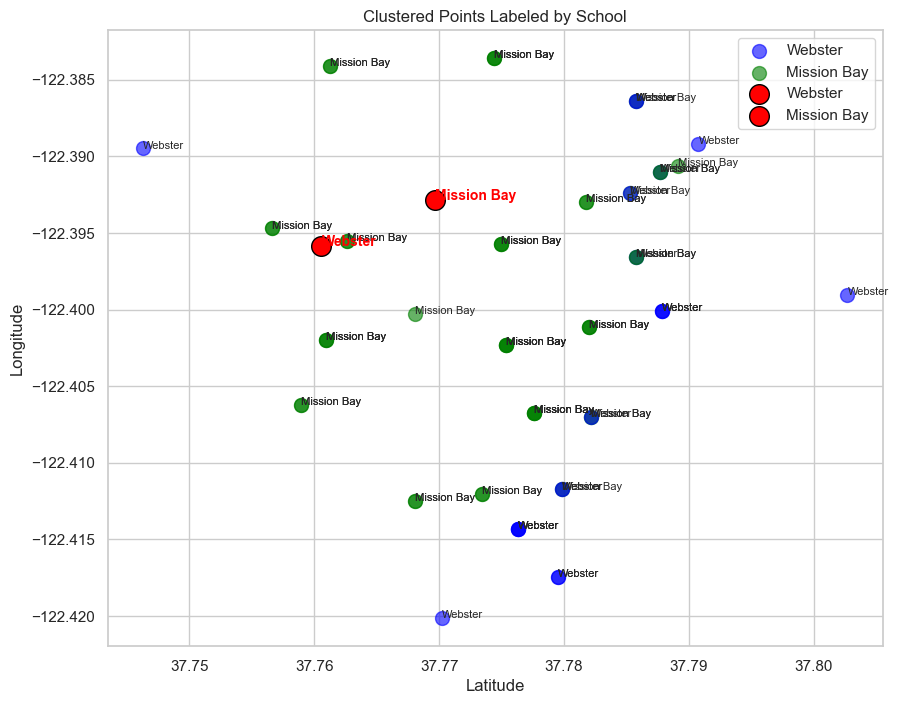

In [267]:
import matplotlib.pyplot as plt

schools = {
    "Webster": (37.76057676798076, -122.39584043915268),
    "Mission Bay": (37.76967389137647, -122.39286090674592)
}

LATITUDE_COL = "Latitude"
LONGITUDE_COL = "Longitude"

cluster_to_school = {0: "Webster", 1: "Mission Bay"}

colors = {"Webster": "blue", "Mission Bay": "green"}

plt.figure(figsize=(10, 8))
for _, row in geo_cleaned.iterrows():
    school_label = cluster_to_school[int(row["Cluster"])]
    plt.scatter(
        row[LATITUDE_COL],
        row[LONGITUDE_COL],
        color=colors[school_label],
        label=f"{school_label}" if f"{school_label}" not in plt.gca().get_legend_handles_labels()[1] else "",
        alpha=0.6,
        s=100 
    )
    plt.text(row[LATITUDE_COL], row[LONGITUDE_COL], f"{school_label}", fontsize=8)

for school, coord in schools.items():
    plt.scatter(
        coord[0], coord[1], color="red", s=200, label=school, edgecolor="black"
    )
    plt.text(coord[0], coord[1], school, fontsize=10, fontweight="bold", color="red")

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Clustered Points Labeled by School")
plt.legend()
plt.grid(True)

plt.show()